In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Using kernel principal component analysis for nonlinear mappings
# Kernal PCA to transform data that is not linearly separable onto new lower dimensional subspace that is suitable
# for linear classifiers

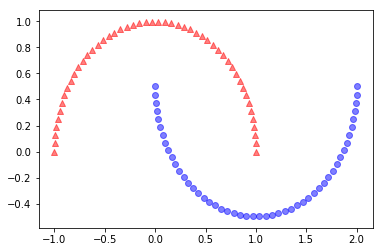

In [2]:
# Example 1 - separating half-moon shapes
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.show()

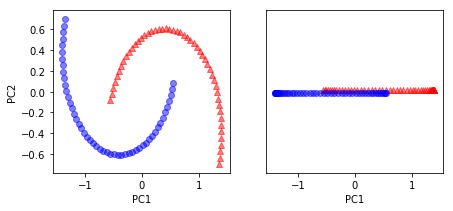

In [3]:
# These half moons (different classes) not linearly separable
# Goal is to unfold the half-moons via kernel PCA so that data can serve as suitable input for linear classifier

# Project it onto principal components via standard PCA:

from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], # principal component 1 on x-axis, 2 on y-axis
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
# visualize PC1 on its own, and the overlap
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1)) + 0.02, # to see overlap
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1)) - 0.02, # to see overlap
              color = 'blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

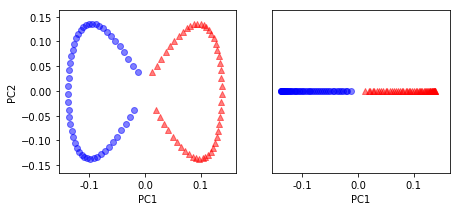

In [4]:
#using rbf_kernel_pca
from rbf_kernel_pca import rbf_kernel_pca
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1)),
             color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1)),
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()
# two classes are linearly well separated so that it becomes suitable training dataset for linear classifiers
# to set gamma, have to use model evaluation and hyperparaeter tuning

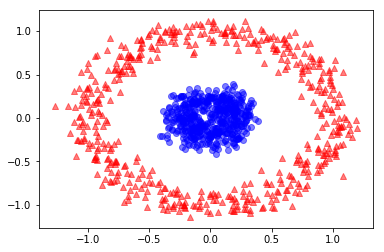

In [5]:
# Example 2 - separating concentric circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                   random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.show()

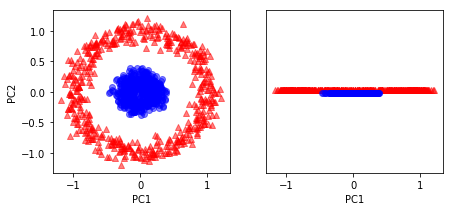

In [6]:
# Standard PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
             color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1)) + 0.02, # to see overlap
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1)) - 0.02, # to see overlap
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

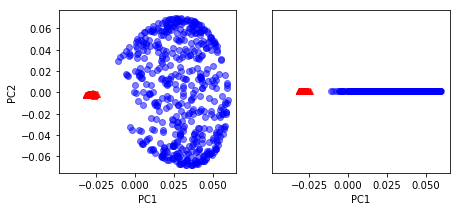

In [7]:
# RBF kernel PCA implementation:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1)),
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1)),
             color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [8]:
# Projecting new data points

from rbf_kernel_pca2 import rbf_kernel_pca2

# create half-moon dataet
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca2(X, gamma=15, n_components=1)

In [16]:
# assume that 26th point form half-moon dataset is new data point x'
x_new = X[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [10]:
# project x' onto new subspace
x_proj = alphas[25] # original projection
x_proj

array([-0.07877284])

In [13]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum(
            (X_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [17]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([-0.07877284])

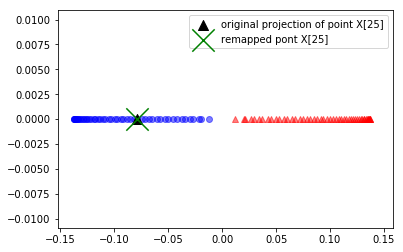

In [18]:
# visualize projection on the first principal component
plt.scatter(alphas[y==0, 0], np.zeros((50)),
           color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),
           color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
           label='original projection of point X[25]',
           marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
           label='remapped pont X[25]',
           marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show() 

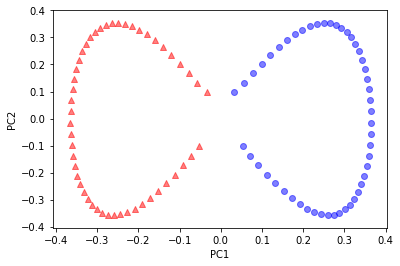

In [20]:
# Kernel principal component analysis in scikit-learn
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
                       kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
# half-moon shape data
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()